In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import joblib

# Step 2: Load dataset from your Drive
file_path = "/content/drive/MyDrive/Major Project/BolusTracking.csv"
df = pd.read_csv(file_path)

# Step 3: Drop first column 'Hospital Number'
df = df.drop(columns=[df.columns[0]])

# Step 4: Encode 'Sex' (Male/Female → 0/1)
le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])

# Step 5: Define features (X) and target (y)
X = df.drop(columns=["Bolus tracking time(seconds)"])
y = df["Bolus tracking time(seconds)"]

# Step 5a: Keep only numeric columns
X = X.select_dtypes(include=["number"])

# Step 5b: Handle missing values (NaN) using mean imputation
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42
)

# Step 7: Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 8: Evaluate model
r2 = model.score(X_test, y_test)
print("Model R² Score:", r2)

# Step 9: Save model back to Drive
joblib.dump(model, "/content/drive/MyDrive/Major Project/linear_regression_bolus.pkl")
print("Model saved to Drive as linear_regression_bolus.pkl")


Model R² Score: 0.19701558238762518
Model saved to Drive as linear_regression_bolus.pkl


In [ ]:
# Step 1: Import joblib if not already imported
import joblib
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load the saved model (optional, since model is already trained)
model = joblib.load("/content/drive/MyDrive/Major Project/linear_regression_bolus.pkl")

# Step 3: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 4: Evaluate performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R² Score on Test Set:", r2)
print("Mean Squared Error on Test Set:", mse)

# Step 5: Optional - create a DataFrame to see actual vs predicted
import pandas as pd

results = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})
print(results.head(10))  # show first 10 rows


R² Score on Test Set: 0.19701558238762518
Mean Squared Error on Test Set: 12.364423068868737
     Actual  Predicted
695      21  21.609960
666      18  16.188092
63       17  19.192562
533      27  20.854599
66       17  15.306973
621      19  19.275680
346      17  19.307853
490      15  16.913915
750      28  17.603783
456      15  18.536464


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Predict on test set
y_pred = model.predict(X_test)

# Regression metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("R² Score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)


R² Score: 0.19701558238762518
Mean Squared Error (MSE): 12.364423068868737
Root Mean Squared Error (RMSE): 3.5163081589742298
Mean Absolute Error (MAE): 2.7358554545313405


Accuracy: 0.64375
Confusion Matrix:
 [[40 36]
 [21 63]]
F1 Score: 0.6885245901639344


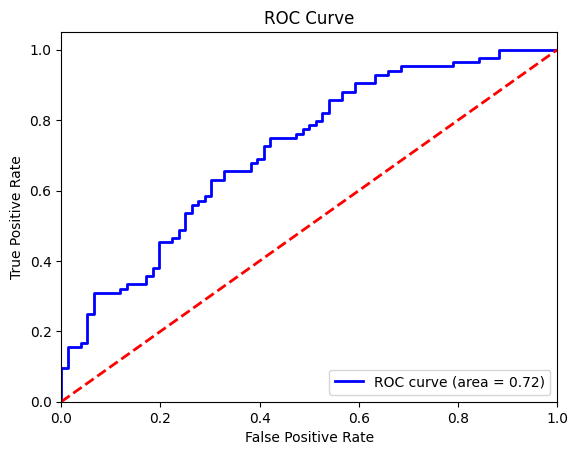

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Choose a threshold to convert regression to classification
threshold = y_train.median()  # you can also use mean
y_test_class = (y_test >= threshold).astype(int)  # 1 = slow, 0 = fast
y_pred_class = (model.predict(X_test) >= threshold).astype(int)

# Step 2: Accuracy
acc = accuracy_score(y_test_class, y_pred_class)
print("Accuracy:", acc)

# Step 3: Confusion Matrix
cm = confusion_matrix(y_test_class, y_pred_class)
print("Confusion Matrix:\n", cm)

# Step 4: F1 Score
f1 = f1_score(y_test_class, y_pred_class)
print("F1 Score:", f1)

# Step 5: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_class, model.predict(X_test))
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
